#### Importación de librerias

In [1]:
import biosignalsnotebooks as bsnb
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pywt

from numpy import array, mean, average, std, sum, sqrt, where, argmax
from numpy.random import normal
from scipy.signal import iirnotch, lfilter


#### Importación de las señales

In [2]:
Tibial_Inicial = np.genfromtxt("../sEMG_Signals/TibialAnterior_FaseInicial.txt",  delimiter="\t",skip_header = 3)
Tibial_Final = np.genfromtxt("../sEMG_Signals/TibialAnterior_FaseFinal.txt",  delimiter="\t",skip_header = 3)
Fs = 1000
Ts = 1/Fs
Tibial_Inicial = Tibial_Inicial[:,5]
Tibial_Final = Tibial_Final[:,5]
Time1 = bsnb.generate_time(Tibial_Inicial, Fs)
Time2 = bsnb.generate_time(Tibial_Final, Fs)

In [3]:
# Funcion de transferencia
Gemg = 1009
Vcc = 3.3
n = 10

Tibial_Inicial = (((Tibial_Inicial/2**n)-(1/2))*Vcc)/Gemg
Tibial_Inicial = Tibial_Inicial * 1000

Tibial_Final = (((Tibial_Final/2**n)-(1/2))*Vcc)/Gemg
Tibial_Final = Tibial_Final * 1000

#### Señal incial

##### Visualización

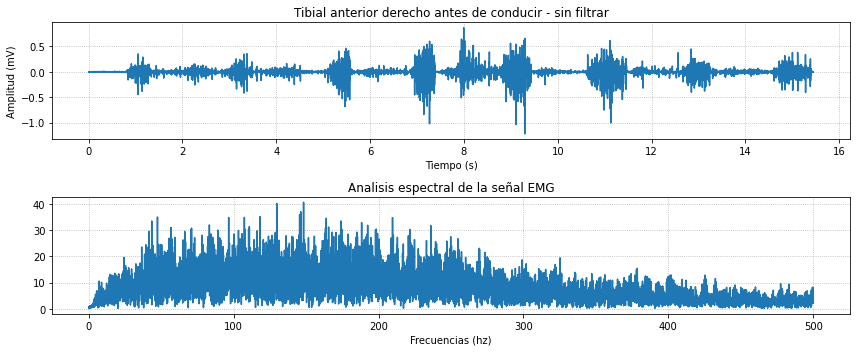

In [4]:
#Transformada de Fourier
freq_axis_1, power_spect_1 = bsnb.plotfft(Tibial_Inicial, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time1,Tibial_Inicial)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Tibial anterior derecho antes de conducir - sin filtrar")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_1, power_spect_1)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Filtrado

In [5]:
Tibial_InicialFilter = bsnb.bandpass(Tibial_Inicial, f1=30,f2=350, order=8, fs=Fs)

# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
Tibial_InicialFilter = lfilter(b, a, Tibial_InicialFilter)
Tibial_InicialFilter = lfilter(b, a, Tibial_InicialFilter)

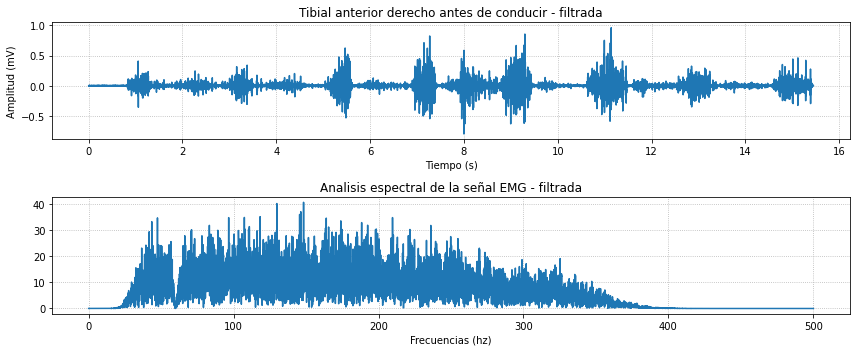

In [6]:
#Transformada de Fourier
freq_axis_2, power_spect_2 = bsnb.plotfft(Tibial_InicialFilter, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time1,Tibial_InicialFilter)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Tibial anterior derecho antes de conducir - filtrada")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG - filtrada")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_2, power_spect_2)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Características

In [7]:
Caracteristicas_Inicial = {}
Caracteristicas_Inicial = bsnb.emg_parameters(Tibial_InicialFilter, Fs, raw_to_mv=False)


##### Señal después de conducir

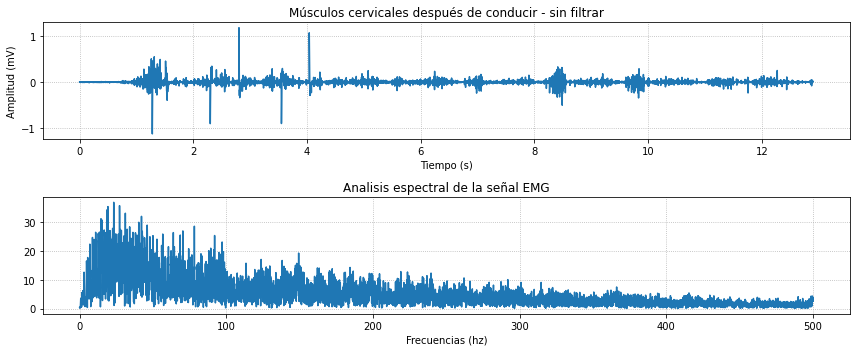

In [8]:
#Transformada de Fourier
freq_axis_3, power_spect_3 = bsnb.plotfft(Tibial_Final, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time2,Tibial_Final)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Músculos cervicales después de conducir - sin filtrar")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_3, power_spect_3)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Filtrado

In [9]:
Tibial_FinalFilter = bsnb.bandpass(Tibial_Final, f1=30,f2=350, order=8, fs=Fs)

# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
Tibial_FinalFilter = lfilter(b, a, Tibial_FinalFilter)
Tibial_FinalFilter = lfilter(b, a, Tibial_FinalFilter)

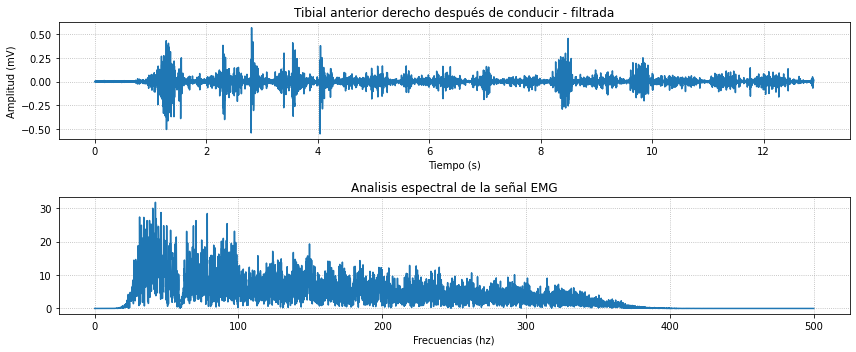

In [10]:
#Transformada de Fourier
freq_axis_4, power_spect_4 = bsnb.plotfft(Tibial_FinalFilter, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time2,Tibial_FinalFilter)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Tibial anterior derecho después de conducir - filtrada")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_4, power_spect_4)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Características

In [11]:
import json


Caracteristicas_Final = {}
Caracteristicas_Final = bsnb.emg_parameters(Tibial_FinalFilter, Fs, raw_to_mv=False)
#print(Caracteristicas_Final)

comparison_car = {}
comparison_car["Caracteristicas iniciales"] = Caracteristicas_Inicial 
comparison_car["Caracteristicas finales"] = Caracteristicas_Final
print(json.dumps(comparison_car, indent=4))

{
    "Caracteristicas iniciales": {
        "Number of Muscular Activations": 9,
        "Maximum Muscular Activation Duration": 0.921059615509094,
        "Minimum Muscular Activation Duration": 0.2140138520292576,
        "Average Muscular Activation Duration": 0.5955941053358361,
        "Standard Deviation of Muscular Activation Duration": 0.2044670382460855,
        "Maximum Sample Value": 0.9625423750380034,
        "Minimum Sample Value": -0.798349918395286,
        "Average Sample Value": 1.5771280625794506e-06,
        "Standard Deviation Sample Value": 0.07934205529324846,
        "RMS": 0.0793420553089232,
        "Area": 0.025558312831308723,
        "Total Power Spect": 0.006817427444750492,
        "Median Frequency": 160.15625,
        "Maximum Power Frequency": 144.53125
    },
    "Caracteristicas finales": {
        "Number of Muscular Activations": 7,
        "Maximum Muscular Activation Duration": 1.0750833397937827,
        "Minimum Muscular Activation Duration": 